# Sentiment Analysis - Data Exploration & Preprocessing

This notebook explores the sentiment dataset, performs basic cleaning, and prepares the data for training.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Configure plotting style
sns.set_style("whitegrid")
%matplotlib inline

In [36]:
df = pd.read_csv("../data/dataset.csv",encoding="latin1",)
df.columns = ["target", "ids", "date", "flag", "user", "text"]

## 1. Data Loading
Load the dataset and assign proper column names.

In [37]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [38]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [39]:
df.drop(["ids","date","flag","user"],axis=1,inplace=True)

# Map target: 0 -> Negative, 2 -> Neutral, 4 -> Positive
df["sentiment_label"] = df["target"].map({0: "Negative", 2: "Neutral", 4: "Positive"})

## 2. Data Cleaning
Remove unnecessary columns and map target values for better readability.

/tmp/ipykernel_299687/2443979470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='viridis')


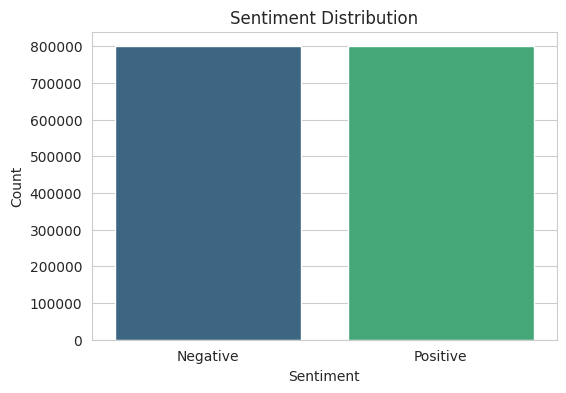

target
4    800000
0    799999
Name: count, dtype: int64


In [40]:
# Check class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment_label', data=df, palette='viridis')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

print(df["target"].value_counts())

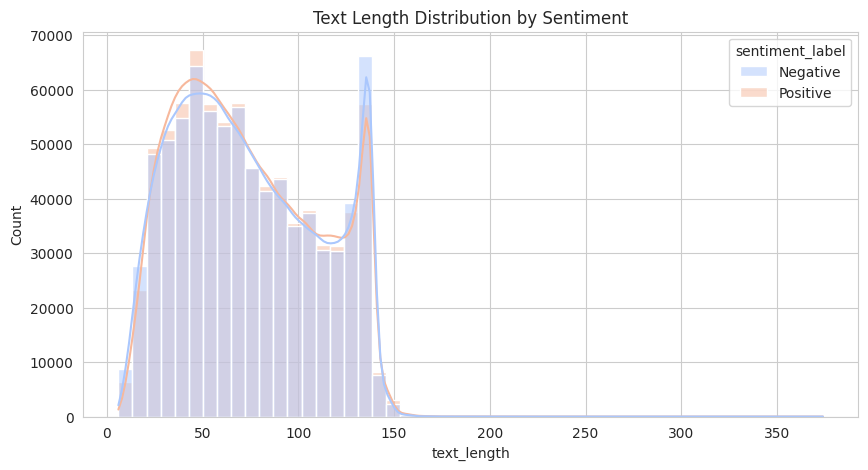

In [41]:
# Calculate text length
df['text_length'] = df['text'].astype(str).apply(len)

# Plot text length distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='text_length', hue='sentiment_label', bins=50, kde=True, palette='coolwarm')
plt.title("Text Length Distribution by Sentiment")
plt.show()

## 3. Feature Engineering
Analyze text length to see if there's a difference between positive and negative tweets.

In [42]:
def clean_text(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    return text

# Apply cleaning
df['cleaned_text'] = df['text'].apply(clean_text)
df[['text', 'cleaned_text']].head()

,text,cleaned_text
0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
1,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball. managed to s...
2,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
4,@Kwesidei not the whole crew,not the whole crew


## 4. Text Preprocessing
Simple cleanup to remove URLs, user mentions, and special characters.

## 5. Export Data
Save the cleaned dataset for model training.

In [43]:
# Save to CSV
df.to_csv("../data/cleaned.csv", index=False)
print("Dataset saved to ../data/cleaned.csv")

Dataset saved to ../data/cleaned.csv
